C:\Users\User\AppData\Local\Temp\ipykernel_1136\1253100839.py:45: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  scatter.set_data(x, y)


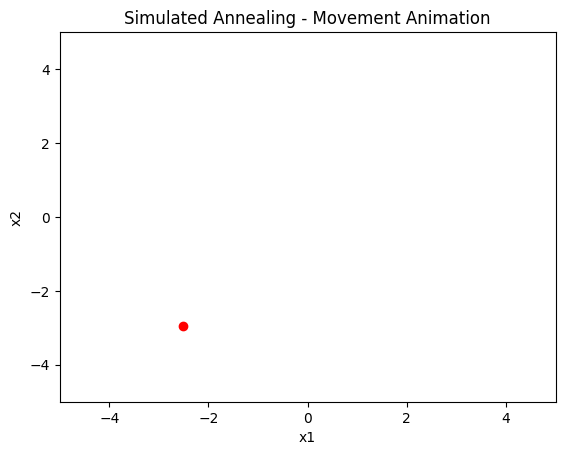

C:\Users\User\AppData\Local\Temp\ipykernel_1136\1253100839.py:77: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  scatter.set_data(x, y)


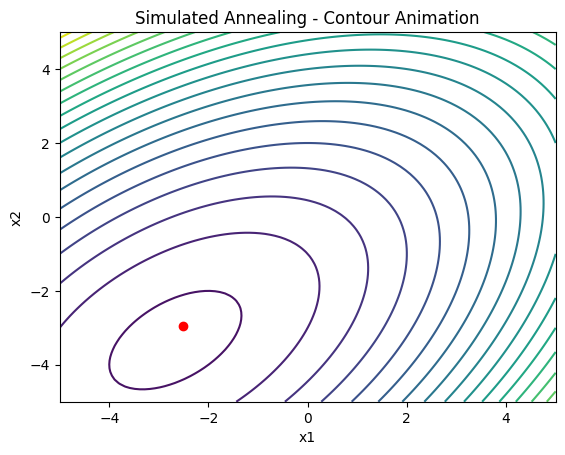

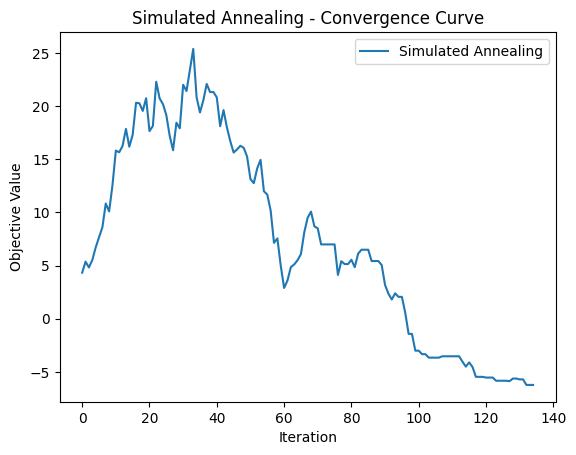

Simulated Annealing:
Final Solution: [-2.5112801  -2.95278566]
Best Objective Value: -6.223503811947625


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Objective function
def objective_function(X):
    if len(X) < 2:
        raise ValueError("Objective function requires at least 2 variables.")
    return X[0]**2 - X[0]*X[1] + X[1]**2 + 2*X[0] + 4*X[1] + 3

# Simulated Annealing (SA)
def simulated_annealing(initial_solution, initial_temperature, cooling_rate):
    current_solution = initial_solution
    temperature = initial_temperature
    history = []

    while temperature > 0.1:
        neighbor_solution = current_solution + np.random.uniform(-0.5, 0.5, len(current_solution))

        current_cost = objective_function(current_solution)
        neighbor_cost = objective_function(neighbor_solution)

        if neighbor_cost < current_cost or np.random.rand() < np.exp((current_cost - neighbor_cost) / temperature):
            current_solution = neighbor_solution

        history.append((current_solution.copy(), objective_function(current_solution)))  # Store both position and fitness
        temperature *= cooling_rate

    return current_solution, objective_function(current_solution), history

# Plotting functions
def plot_movement_animation(algorithm_name, history, search_space, save_gif=True):
    fig, ax = plt.subplots()
    ax.set_xlim(search_space[0], search_space[1])
    ax.set_ylim(search_space[0], search_space[1])
    scatter, = ax.plot([], [], 'ro')

    def init():
        scatter.set_data([], [])
        return scatter,

    def update(frame):
        position, fitness = frame
        x, y = position
        scatter.set_data(x, y)
        return scatter,

    ani = FuncAnimation(fig, update, frames=history, init_func=init, blit=True)
    plt.title(f'{algorithm_name} - Movement Animation')
    plt.xlabel('x1')
    plt.ylabel('x2')

    if save_gif:
        ani.save(f'{algorithm_name}_animation.gif', writer='pillow', fps=5)

    plt.show()

def plot_contour_animation(algorithm_name, history, search_space, save_gif=True):
    x = np.linspace(search_space[0], search_space[1], 100)
    y = np.linspace(search_space[0], search_space[1], 100)
    X, Y = np.meshgrid(x, y)
    Z = objective_function(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)

    fig, ax = plt.subplots()
    ax.set_xlim(search_space[0], search_space[1])
    ax.set_ylim(search_space[0], search_space[1])
    contour = ax.contour(X, Y, Z, levels=20, cmap='viridis')
    scatter, = ax.plot([], [], 'ro')

    def init():
        scatter.set_data([], [])
        return scatter,

    def update(frame):
        position, fitness = frame
        x, y = position
        scatter.set_data(x, y)
        return scatter,

    ani = FuncAnimation(fig, update, frames=history, init_func=init, blit=True)
    plt.title(f'{algorithm_name} - Contour Animation')
    plt.xlabel('x1')
    plt.ylabel('x2')

    if save_gif:
        ani.save(f'{algorithm_name}_contour_animation.gif', writer='pillow', fps=5)

    plt.show()

def plot_convergence_curve(algorithm_name, history):
    plt.plot(range(len(history)), [val[1] for val in history], label=algorithm_name)
    plt.title(f'{algorithm_name} - Convergence Curve')
    plt.xlabel('Iteration')
    plt.ylabel('Objective Value')
    plt.legend()
    plt.show()

# Main routine
search_space = (-5, 5)
initial_solution = np.array([0.0, 0.0])

# Simulated Annealing
result_sa, best_value_sa, history_sa = simulated_annealing(initial_solution, 100, 0.95)
plot_movement_animation('Simulated Annealing', history_sa, search_space)
plot_contour_animation('Simulated Annealing', history_sa, search_space)
plot_convergence_curve('Simulated Annealing', history_sa)
print("Simulated Annealing:")
print("Final Solution:", result_sa)
print("Best Objective Value:", best_value_sa)